In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style

In [3]:
df_konggang_price = pd.read_parquet("konggang_housing_price.parquet")

In [4]:
df_konggang_rent = pd.read_parquet("konggang_housing_rent.parquet")

In [5]:
df_longtousi_price = pd.read_parquet("Longtousi_sale_data_20pages(2).parquet")

In [6]:
df_longtousi_rent = pd.read_parquet("Longtousi_rental_data_20pages(2).parquet")

In [7]:
df_dazhulin_price = pd.read_parquet("dazhulin_sale.parquet")

In [8]:
df_dazhulin_rent = pd.read_parquet("dazhulin_rent.parquet")

In [9]:
df_centralpark_price = pd.read_parquet("CentralPark_sale_data.parquet")

In [10]:
df_centralpark_rent = pd.read_parquet("CentralPark_rent_data.parquet")

接下来是处理然后合并数据，首先是price

In [11]:
df_konggang_price[["Area","Total_price","Block"]] = df_konggang_price[['面积（㎡）','价格（元）','block']]

df_konggang_price = df_konggang_price[["Area","Total_price","Block"]].copy()

df_longtousi_price["Block"] = "龙头寺"
df_longtousi_price["Total_price"] = df_longtousi_price['Price'].astype(float)*10000
df_longtousi_price = df_longtousi_price[["Area","Total_price","Block"]].copy()

df_dazhulin_price[["Area","Total_price","Block"]] = df_dazhulin_price[['面积','总价','区域']]
df_dazhulin_price = df_dazhulin_price[["Area","Total_price","Block"]].copy()

df_centralpark_price["Block"] = "中央公园"
df_centralpark_price["Total_price"] = df_centralpark_price['Price'].astype(float)*10000
df_centralpark_price = df_centralpark_price[["Area","Total_price","Block"]].copy()

df_konggang_price['id'] = df_konggang_price.index
df_centralpark_price['id'] = df_centralpark_price.index
df_longtousi_price['id'] = df_longtousi_price.index
df_dazhulin_price['id'] = df_dazhulin_price.index

df_concatenated_price = pd.concat([df_konggang_price, df_centralpark_price, df_longtousi_price, df_dazhulin_price], ignore_index=True)
df_concatenated_price[["Area", "Total_price"]] = df_concatenated_price[["Area", "Total_price"]].astype(float)

接下来是rent数据的合并

In [12]:
df_konggang_rent[["Area","Total_rent","Block"]] = df_konggang_rent[['面积（㎡）','价格（元/月）','block']]

df_konggang_rent = df_konggang_rent[["Area","Total_rent","Block"]].copy()

df_longtousi_rent["Block"] = "龙头寺"
df_longtousi_rent["Total_rent"] = df_longtousi_rent['Rent']
df_longtousi_rent = df_longtousi_rent[["Area","Total_rent","Block"]].copy()

df_dazhulin_rent["Block"] = "大竹林"
df_dazhulin_rent[["Area","Total_rent"]] = df_dazhulin_rent[['面积','月租金']]
df_dazhulin_rent = df_dazhulin_rent[["Area","Total_rent","Block"]].copy()

df_centralpark_rent["Block"] = "中央公园"
df_centralpark_rent["Total_rent"] = df_centralpark_rent['Rent']
df_centralpark_rent = df_centralpark_rent[["Area","Total_rent","Block"]].copy()

df_konggang_rent['id'] = df_konggang_rent.index
df_centralpark_rent['id'] = df_centralpark_rent.index
df_longtousi_rent['id'] = df_longtousi_rent.index
df_dazhulin_rent['id'] = df_dazhulin_rent.index

df_concatenated_rent = pd.concat([df_konggang_rent, df_centralpark_rent, df_longtousi_rent, df_dazhulin_rent], ignore_index=True)
df_concatenated_rent[["Area", "Total_rent"]] = df_concatenated_rent[["Area", "Total_rent"]].astype(float)

In [13]:
df_concatenated_rent

,Area,Total_rent,Block,id
0,37.0,1300.0,空港,0
1,21.0,600.0,空港,1
2,130.0,1600.0,空港,2
3,283.0,2800.0,空港,3
4,105.0,1900.0,空港,4
...,...,...,...,...
3309,250.0,10000.0,大竹林,410
3310,150.0,780.0,大竹林,411
3311,141.0,3200.0,大竹林,412
3312,230.0,16000.0,大竹林,413


In [14]:
df_concatenated_price

,Area,Total_price,Block,id
0,90.000000,680000.0,空港,0
1,96.430000,670000.0,空港,1
2,90.000000,700000.0,空港,2
3,81.000000,470000.0,空港,3
4,80.000000,480000.0,空港,4
...,...,...,...,...
4795,148.879605,1960000.0,大竹林,1195
4796,239.991830,4700000.0,大竹林,1196
4797,216.999399,6500000.0,大竹林,1197
4798,264.185072,5550000.0,大竹林,1198


接下来是数据描述与异常值检验

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [16]:
# 数据描述函数
def describe_data(df, data_type):
    print(f"\n{data_type}数据描述:")
    print(df.describe())
    
    # 检查异常值 (使用IQR方法)
    Q1 = df['Area'].quantile(0.25)
    Q3 = df['Area'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['Area'] < lower_bound) | (df['Area'] > upper_bound)]
    print(f"\n{data_type}数据异常值数量: {len(outliers)}")
    
    return outliers

# 描述房价数据
price_outliers = describe_data(df_concatenated_price, "房价")
# 描述租金数据  
rent_outliers = describe_data(df_concatenated_rent, "租金")




房价数据描述:
              Area   Total_price           id
count  4799.000000  4.800000e+03  4800.000000
mean    126.234576  1.788423e+06   599.500000
std      72.671163  2.092911e+06   346.446131
min      27.000000  1.850000e+05     0.000000
25%      90.000000  8.500000e+05   299.750000
50%     109.450000  1.325000e+06   599.500000
75%     139.000000  2.000000e+06   899.250000
max     864.540000  4.800000e+07  1199.000000

房价数据异常值数量: 341

租金数据描述:
              Area    Total_rent           id
count  3314.000000   3314.000000  3314.000000
mean     99.802052   2619.651780   497.572722
std      48.066818   2541.759391   345.343759
min      18.000000    130.000000     0.000000
25%      79.000000   1600.000000   207.000000
50%      95.000000   2200.000000   414.000000
75%     116.000000   2800.000000   785.000000
max     600.000000  36000.000000  1199.000000

租金数据异常值数量: 166


计算每个Block的单位房屋定价和租金

In [17]:
# 计算每平方米价格和租金
df_concatenated_price['price_per_m2'] = df_concatenated_price['Total_price'] / df_concatenated_price['Area']
df_concatenated_rent['rent_per_m2'] = df_concatenated_rent['Total_rent'] / df_concatenated_rent['Area']
# 分别计算每个区块的房价和租金统计
price_block_stats = df_concatenated_price.groupby('Block').agg({
    'price_per_m2': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Area': ['mean', 'median']
}).round(2)

rent_block_stats = df_concatenated_rent.groupby('Block').agg({
    'rent_per_m2': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Area': ['mean', 'median']
}).round(2)

print("每个区块的房价统计描述:")
print(price_block_stats)
print("\n每个区块的租金统计描述:")
print(rent_block_stats)

每个区块的房价统计描述:
      price_per_m2                                                    Area  \
             count      mean    median      std      min       max    mean   
Block                                                                        
中央公园          1200  14281.21  13972.60  4004.78  4059.54  62595.42  146.67   
大竹林           1200  16023.63  15318.50  5043.61  6703.00  58462.00  144.77   
空港            1199   7453.84   7305.49  1612.37  3337.69  14365.75   95.38   
龙头寺           1200  13169.77  12637.36  3658.05  6339.87  33448.01  118.09   

               
       median  
Block          
中央公园   123.38  
大竹林    132.73  
空港      91.00  
龙头寺    102.76  

每个区块的租金统计描述:
      rent_per_m2                                       Area       
            count   mean median    std   min     max    mean median
Block                                                              
中央公园         1200  24.88  25.00  11.11  1.31  106.19   97.48   96.0
大竹林           415  30.71  29.17  12.38  5.

检验不同Block的异常值

In [18]:
import pandas as pd
import numpy as np

print("=== 数据清洗 - 处理缺失值和异常值 ===")

# 1. 处理缺失值
print("处理缺失值...")

# 房价数据缺失值处理
original_len = len(df_concatenated_price)
df_concatenated_price = df_concatenated_price.dropna(subset=['Area', 'Total_price'])
print(f"房价数据: 删除缺失值后 {len(df_concatenated_price)} 行 (原 {original_len} 行)")

# 租金数据缺失值处理
original_len = len(df_concatenated_rent)
df_concatenated_rent = df_concatenated_rent.dropna(subset=['Area', 'Total_rent'])
print(f"租金数据: 删除缺失值后 {len(df_concatenated_rent)} 行 (原 {original_len} 行)")

# 2. 计算每平方米价格和租金
print("\n计算每平方米价格和租金...")
df_concatenated_price['price_per_m2'] = df_concatenated_price['Total_price'] / df_concatenated_price['Area']
df_concatenated_rent['rent_per_m2'] = df_concatenated_rent['Total_rent'] / df_concatenated_rent['Area']

# 3. 检测和删除异常值
def detect_and_remove_outliers(df, column):
    """检测并删除异常值"""
    original_len = len(df)
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 删除异常值
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    print(f"{column}列: 删除异常值 {original_len - len(df)} 个")
    return df

print("\n删除异常值...")
# 处理房价异常值
df_concatenated_price = detect_and_remove_outliers(df_concatenated_price, 'Area')
df_concatenated_price = detect_and_remove_outliers(df_concatenated_price, 'price_per_m2')

# 处理租金异常值
df_concatenated_rent = detect_and_remove_outliers(df_concatenated_rent, 'Area')
df_concatenated_rent = detect_and_remove_outliers(df_concatenated_rent, 'rent_per_m2')

# 4. 区块级别的异常值检测和删除
print("\n区块级别的异常值检测:")
all_blocks = set(df_concatenated_price['Block'].unique()) | set(df_concatenated_rent['Block'].unique())

def detect_block_outliers(df, column, block):
    block_data = df[df['Block'] == block][column]
    if len(block_data) == 0:
        return pd.DataFrame()
    
    Q1 = block_data.quantile(0.25)
    Q3 = block_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['Block'] == block) & ((df[column] < lower_bound) | (df[column] > upper_bound))]
    return outliers

# 检测并删除区块级别的异常值
for block in all_blocks:
    price_outliers_block = detect_block_outliers(df_concatenated_price, 'price_per_m2', block)
    rent_outliers_block = detect_block_outliers(df_concatenated_rent, 'rent_per_m2', block)
    print(f"区块 {block}: 房价异常值 {len(price_outliers_block)} 个, 租金异常值 {len(rent_outliers_block)} 个")
    
    # 删除检测到的异常值
    if len(price_outliers_block) > 0:
        df_concatenated_price = df_concatenated_price.drop(price_outliers_block.index)
    if len(rent_outliers_block) > 0:
        df_concatenated_rent = df_concatenated_rent.drop(rent_outliers_block.index)

print(f"\n最终数据量:")
print(f"房价数据: {len(df_concatenated_price)} 行")
print(f"租金数据: {len(df_concatenated_rent)} 行")

=== 数据清洗 - 处理缺失值和异常值 ===
处理缺失值...
房价数据: 删除缺失值后 4799 行 (原 4800 行)
租金数据: 删除缺失值后 3314 行 (原 3314 行)

计算每平方米价格和租金...

删除异常值...
Area列: 删除异常值 341 个
price_per_m2列: 删除异常值 38 个
Area列: 删除异常值 166 个
rent_per_m2列: 删除异常值 91 个

区块级别的异常值检测:
区块 空港: 房价异常值 36 个, 租金异常值 30 个
区块 大竹林: 房价异常值 1 个, 租金异常值 35 个
区块 中央公园: 房价异常值 11 个, 租金异常值 0 个
区块 龙头寺: 房价异常值 19 个, 租金异常值 59 个

最终数据量:
房价数据: 4353 行
租金数据: 2933 行


计算不同Block的房价租金比

In [19]:
# 计算每个区块的中位房价和中位租金
median_price_by_block = df_concatenated_price.groupby('Block')['price_per_m2'].median()
median_rent_by_block = df_concatenated_rent.groupby('Block')['rent_per_m2'].median()

# 创建包含所有区块的DataFrame - 修正部分
# 将集合转换为排序后的列表
all_blocks_list = sorted(list(all_blocks))
all_blocks_df = pd.DataFrame(index=all_blocks_list)
all_blocks_df['median_price'] = median_price_by_block
all_blocks_df['median_rent'] = median_rent_by_block

# 计算房价租金比
all_blocks_df['price_rent_ratio'] = all_blocks_df['median_price'] / all_blocks_df['median_rent']

# 移除无限大或NaN的值
all_blocks_df = all_blocks_df.replace([np.inf, -np.inf], np.nan).dropna()

print("各区块中位房价租金比:")
for block, ratio in all_blocks_df['price_rent_ratio'].sort_values(ascending=False).items():
    print(f"区块 {block}: {ratio:.2f}")

各区块中位房价租金比:
区块 中央公园: 552.19
区块 大竹林: 525.36
区块 龙头寺: 500.78
区块 空港: 384.86


 Figure A: Bar Plot the median price to rent ratio for each
 block 

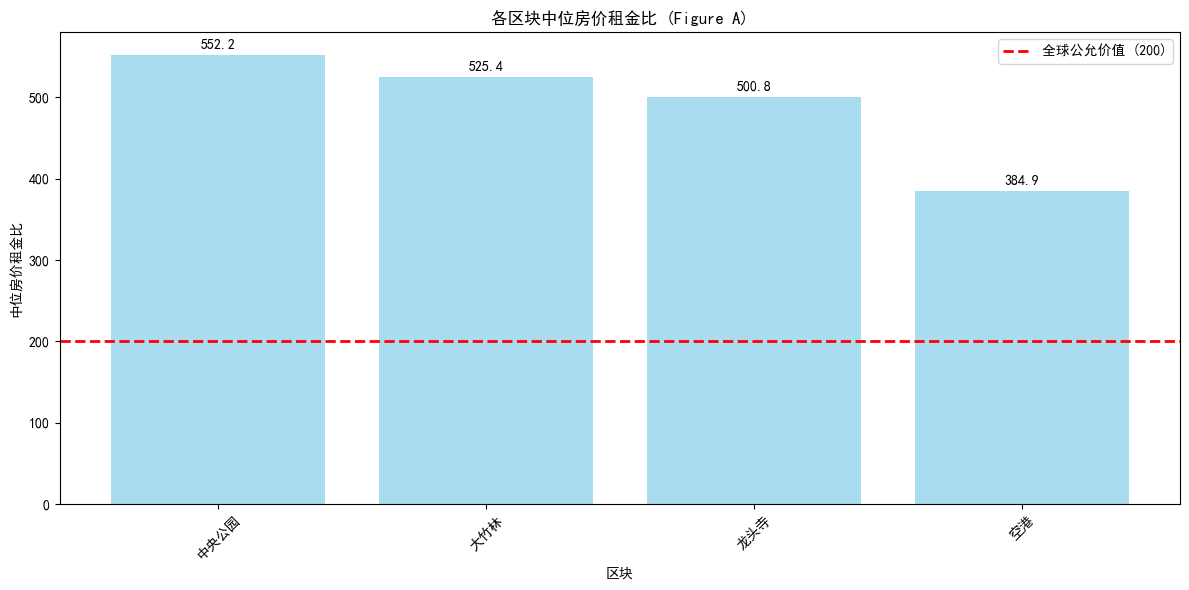

In [20]:
plt.figure(figsize=(12, 6))
sorted_ratios = all_blocks_df['price_rent_ratio'].sort_values(ascending=False)
bars = plt.bar(sorted_ratios.index, sorted_ratios.values, color='skyblue', alpha=0.7)
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
plt.xlabel('区块')
plt.ylabel('中位房价租金比')
plt.title('各区块中位房价租金比 (Figure A)')
plt.xticks(rotation=45)
plt.legend()

# 在柱状图上添加数值标签
for bar, value in zip(bars, sorted_ratios.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

 Homework3-4: Data Science Modeling

In [21]:
# 准备建模数据 - 分别处理房价和租金数据
# 房价模型数据
X_price = pd.get_dummies(df_concatenated_price[['Area', 'Block']].copy(), columns=['Block'], drop_first=True)
y_price = df_concatenated_price['price_per_m2']

# 租金模型数据
X_rent = pd.get_dummies(df_concatenated_rent[['Area', 'Block']].copy(), columns=['Block'], drop_first=True)
y_rent = df_concatenated_rent['rent_per_m2']

# 划分训练测试集
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(
    X_price, y_price, test_size=0.2, random_state=42)
X_rent_train, X_rent_test, y_rent_train, y_rent_test = train_test_split(
    X_rent, y_rent, test_size=0.2, random_state=42)

print("=== Model 1: 房价预测模型 ===")
model1 = LinearRegression()
model1.fit(X_price_train, y_price_train)
y_price_pred = model1.predict(X_price)
r2_model1 = r2_score(y_price, y_price_pred)
print(f"Model 1 R²: {r2_model1:.4f}")

print("\n=== Model 2: 租金预测模型 ===")
model2 = LinearRegression()
model2.fit(X_rent_train, y_rent_train)
y_rent_pred = model2.predict(X_rent)
r2_model2 = r2_score(y_rent, y_rent_pred)
print(f"Model 2 R²: {r2_model2:.4f}")

=== Model 1: 房价预测模型 ===
Model 1 R²: 0.5970

=== Model 2: 租金预测模型 ===
Model 2 R²: 0.2472


In [22]:
# 为每个区块创建一个典型房屋（使用该区块的中位面积）
typical_houses = []
for block in all_blocks:
    # 获取该区块的中位面积（优先使用房价数据，如果没有则使用租金数据）
    price_block_data = df_concatenated_price[df_concatenated_price['Block'] == block]
    rent_block_data = df_concatenated_rent[df_concatenated_rent['Block'] == block]
    
    if len(price_block_data) > 0:
        typical_area = price_block_data['Area'].median()
    elif len(rent_block_data) > 0:
        typical_area = rent_block_data['Area'].median()
    else:
        continue  # 跳过没有数据的区块
    
    typical_houses.append({
        'Block': block,
        'Area': typical_area
    })

typical_houses_df = pd.DataFrame(typical_houses)

# 为模型预测准备数据
X_typical_price = pd.get_dummies(typical_houses_df[['Area', 'Block']].copy(), columns=['Block'], drop_first=True)
X_typical_rent = pd.get_dummies(typical_houses_df[['Area', 'Block']].copy(), columns=['Block'], drop_first=True)

# 确保特征列一致
for col in X_price.columns:
    if col not in X_typical_price.columns:
        X_typical_price[col] = 0
X_typical_price = X_typical_price[X_price.columns]

for col in X_rent.columns:
    if col not in X_typical_rent.columns:
        X_typical_rent[col] = 0
X_typical_rent = X_typical_rent[X_rent.columns]

# 使用模型预测
typical_houses_df['predicted_price_m2'] = model1.predict(X_typical_price)
typical_houses_df['predicted_rent_m2'] = model2.predict(X_typical_rent)
typical_houses_df['predicted_price_rent_ratio'] = typical_houses_df['predicted_price_m2'] / typical_houses_df['predicted_rent_m2']

# 计算每个区块的中位预测房价租金比
median_pred_ratio_by_block = typical_houses_df.groupby('Block')['predicted_price_rent_ratio'].median().sort_values(ascending=False)

Bar Plot the median price to rent ratio for each block

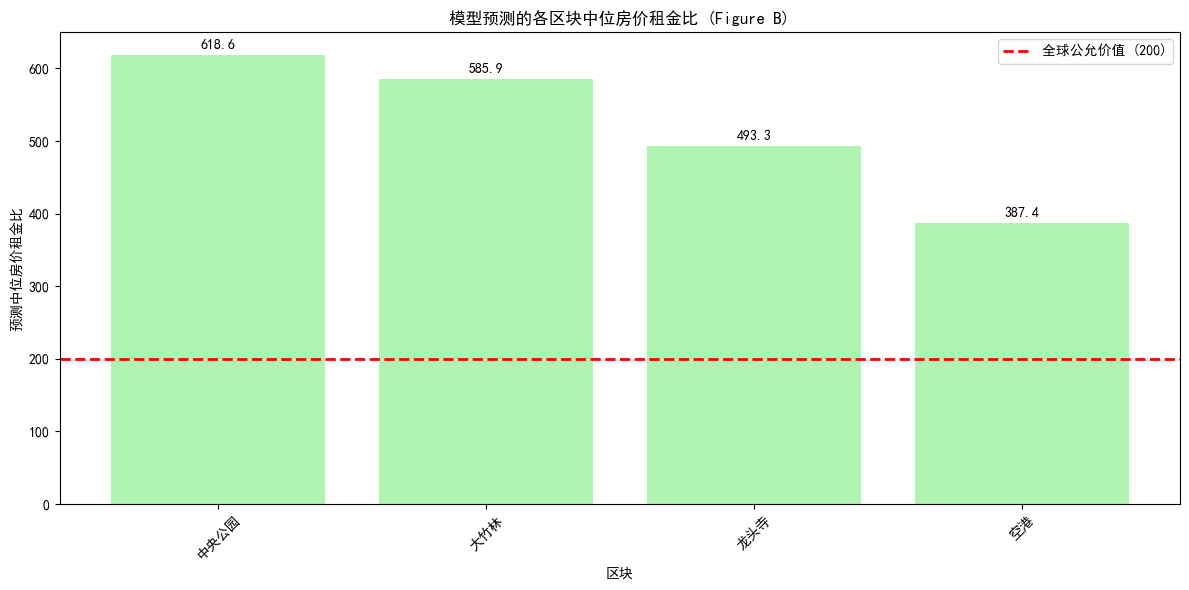

In [23]:

plt.figure(figsize=(12, 6))
bars = plt.bar(median_pred_ratio_by_block.index, median_pred_ratio_by_block.values, color='lightgreen', alpha=0.7)
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
plt.xlabel('区块')
plt.ylabel('预测中位房价租金比')
plt.title('模型预测的各区块中位房价租金比 (Figure B)')
plt.xticks(rotation=45)
plt.legend()

for bar, value in zip(bars, median_pred_ratio_by_block.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Homework3-5: Data Science Modeling Pro Max

In [24]:
# 创建多项式特征和交互项
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_price_poly = poly.fit_transform(X_price)
X_rent_poly = poly.fit_transform(X_rent)

# 获取特征名称
feature_names_price = poly.get_feature_names_out(X_price.columns)
feature_names_rent = poly.get_feature_names_out(X_rent.columns)

print(f"房价原始特征数量: {X_price.shape[1]}")
print(f"房价多项式特征数量: {X_price_poly.shape[1]}")
print(f"租金原始特征数量: {X_rent.shape[1]}")
print(f"租金多项式特征数量: {X_rent_poly.shape[1]}")

# 划分训练测试集
X_price_poly_train, X_price_poly_test, y_price_train, y_price_test = train_test_split(
    X_price_poly, y_price, test_size=0.2, random_state=42)
X_rent_poly_train, X_rent_poly_test, y_rent_train, y_rent_test = train_test_split(
    X_rent_poly, y_rent, test_size=0.2, random_state=42)

print("\n=== Model 1+: 带多项式特征的房价预测模型 ===")
model1_plus = LinearRegression()
model1_plus.fit(X_price_poly_train, y_price_train)
y_price_pred_plus = model1_plus.predict(X_price_poly)
r2_model1_plus = r2_score(y_price, y_price_pred_plus)
print(f"Model 1+ R²: {r2_model1_plus:.4f}")

print("\n=== Model 2+: 带多项式特征的租金预测模型 ===")
model2_plus = LinearRegression()
model2_plus.fit(X_rent_poly_train, y_rent_train)
y_rent_pred_plus = model2_plus.predict(X_rent_poly)
r2_model2_plus = r2_score(y_rent, y_rent_pred_plus)
print(f"Model 2+ R²: {r2_model2_plus:.4f}")

print("\n=== R² 比较 ===")
print(f"房价模型: Model 1 R² = {r2_model1:.4f}, Model 1+ R² = {r2_model1_plus:.4f}")
print(f"租金模型: Model 2 R² = {r2_model2:.4f}, Model 2+ R² = {r2_model2_plus:.4f}")



房价原始特征数量: 4
房价多项式特征数量: 14
租金原始特征数量: 4
租金多项式特征数量: 14

=== Model 1+: 带多项式特征的房价预测模型 ===
Model 1+ R²: 0.6221

=== Model 2+: 带多项式特征的租金预测模型 ===
Model 2+ R²: 0.2773

=== R² 比较 ===
房价模型: Model 1 R² = 0.5970, Model 1+ R² = 0.6221
租金模型: Model 2 R² = 0.2472, Model 2+ R² = 0.2773


In [25]:
# 使用高级模型预测典型房屋数据
# 为典型房屋数据创建多项式特征
X_typical_price_poly = poly.transform(X_typical_price)
X_typical_rent_poly = poly.transform(X_typical_rent)

# 使用高级模型预测
typical_houses_df['predicted_price_m2_plus'] = model1_plus.predict(X_typical_price_poly)
typical_houses_df['predicted_rent_m2_plus'] = model2_plus.predict(X_typical_rent_poly)
typical_houses_df['predicted_price_rent_ratio_plus'] = (
    typical_houses_df['predicted_price_m2_plus'] / typical_houses_df['predicted_rent_m2_plus']
)

# 计算每个区块的中位预测房价租金比 (高级模型)
median_pred_ratio_by_block_plus = typical_houses_df.groupby('Block')['predicted_price_rent_ratio_plus'].median().sort_values(ascending=False)

 Figure C: Bar Plot the price to rent ratio for each block.

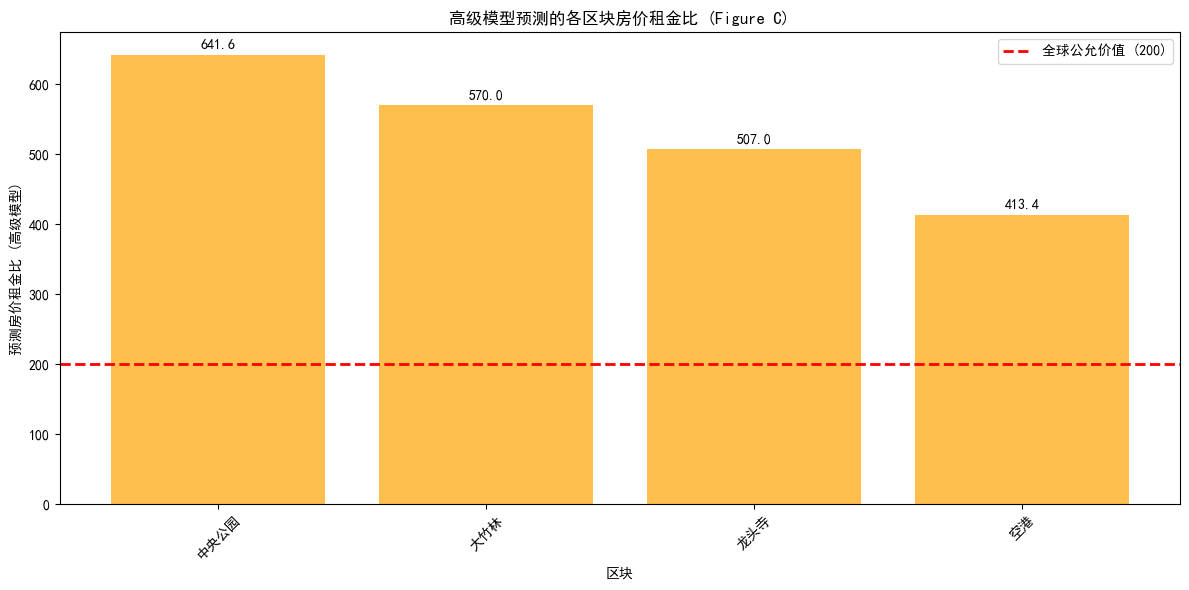

In [26]:
plt.figure(figsize=(12, 6))
bars = plt.bar(median_pred_ratio_by_block_plus.index, median_pred_ratio_by_block_plus.values, color='orange', alpha=0.7)
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
plt.xlabel('区块')
plt.ylabel('预测房价租金比 (高级模型)')
plt.title('高级模型预测的各区块房价租金比 (Figure C)')
plt.xticks(rotation=45)
plt.legend()

for bar, value in zip(bars, median_pred_ratio_by_block_plus.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

比较三种方法

原始数据中位房价租金比已定义
三种方法的房价租金比比较:
        原始数据    基础模型    高级模型
中央公园  552.19  618.60  641.59
大竹林   525.36  585.89  569.99
空港    384.86  387.41  413.39
龙头寺   500.78  493.25  507.01

各区块样本量:
      房价样本量  租金样本量
中央公园   1036   1129
大竹林    1055    302
空港     1160    462
龙头寺    1102   1040

=== 基于样本量的可信度分析 ===
建议:
区块 中央公园: 房价样本 1036, 租金样本 1129, 可信度 高
区块 大竹林: 房价样本 1055, 租金样本 302, 可信度 高
区块 空港: 房价样本 1160, 租金样本 462, 可信度 高
区块 龙头寺: 房价样本 1102, 租金样本 1040, 可信度 高

总体建议:
样本量充足，高级模型可能提供更好的预测性能


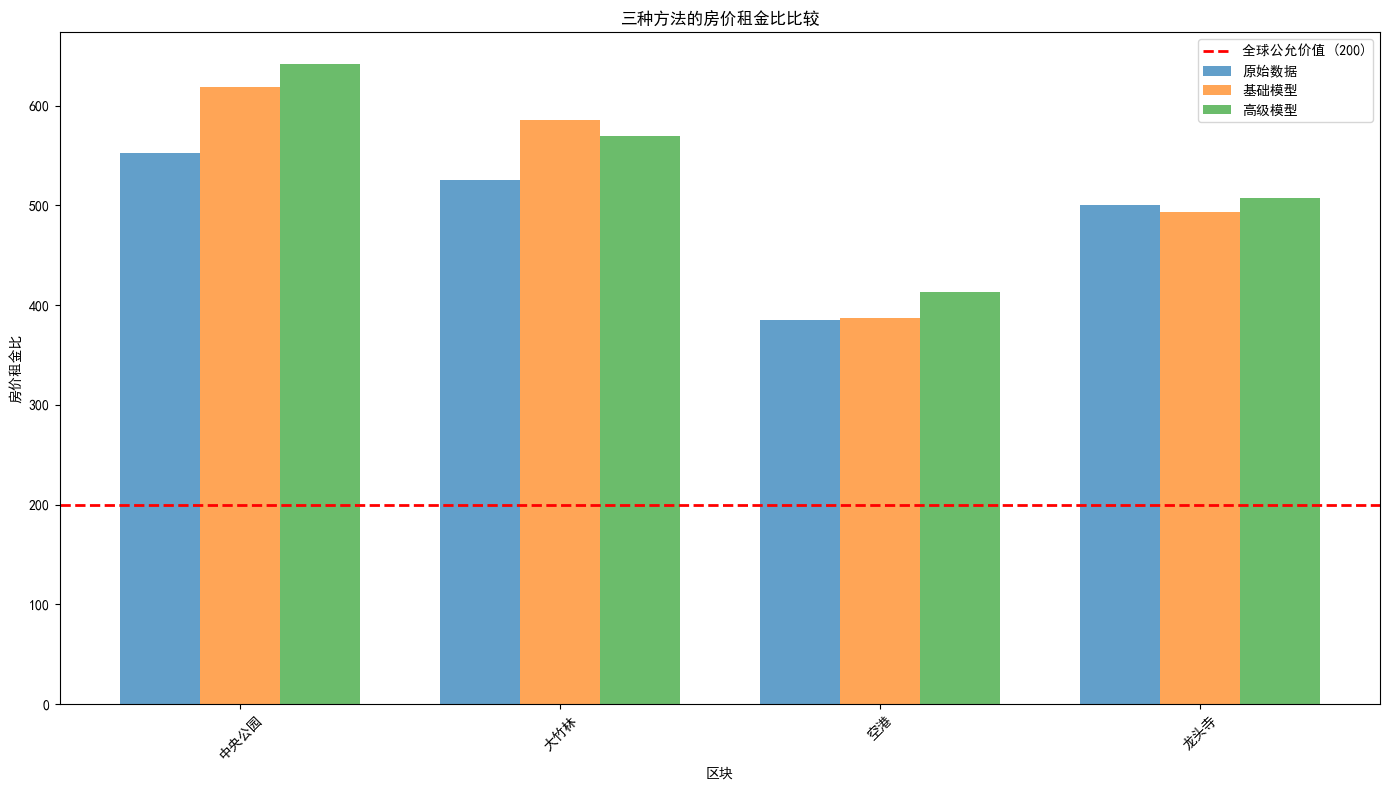

In [27]:
# 原始数据的中位房价租金比 (Figure A部分)
if 'all_blocks_df' in locals() and 'price_rent_ratio' in all_blocks_df.columns:
    median_ratio_by_block = all_blocks_df['price_rent_ratio']
    print("原始数据中位房价租金比已定义")
else:
    print("警告: 原始数据中位房价租金比未定义，需要重新计算")
    # 重新计算原始数据的中位房价租金比
    median_price_by_block = df_concatenated_price.groupby('Block')['price_per_m2'].median()
    median_rent_by_block = df_concatenated_rent.groupby('Block')['rent_per_m2'].median()
    all_blocks_list = sorted(list(set(df_concatenated_price['Block'].unique()).union(set(df_concatenated_rent['Block'].unique()))))
    all_blocks_df = pd.DataFrame(index=all_blocks_list)
    all_blocks_df['median_price'] = median_price_by_block
    all_blocks_df['median_rent'] = median_rent_by_block
    all_blocks_df['price_rent_ratio'] = all_blocks_df['median_price'] / all_blocks_df['median_rent']
    all_blocks_df = all_blocks_df.replace([np.inf, -np.inf], np.nan).dropna()
    median_ratio_by_block = all_blocks_df['price_rent_ratio']

# 基础模型预测的中位房价租金比 (Figure B部分)
if 'median_pred_ratio_by_block' not in locals():
    print("警告: 基础模型预测的中位房价租金比未定义，需要重新计算")
    # 这里需要重新计算基础模型的预测
    # 假设 typical_houses_df 和 predicted_price_rent_ratio 列已存在
    if 'typical_houses_df' in locals() and 'predicted_price_rent_ratio' in typical_houses_df.columns:
        median_pred_ratio_by_block = typical_houses_df.groupby('Block')['predicted_price_rent_ratio'].median()
    else:
        print("错误: 无法计算基础模型预测，需要先运行基础模型部分")
        # 这里可以添加基础模型的重新计算代码

# 高级模型预测的中位房价租金比 (Figure C部分)
if 'median_pred_ratio_by_block_plus' not in locals():
    print("警告: 高级模型预测的中位房价租金比未定义，需要重新计算")
    # 这里需要重新计算高级模型的预测
    # 假设 typical_houses_df 和 predicted_price_rent_ratio_plus 列已存在
    if 'typical_houses_df' in locals() and 'predicted_price_rent_ratio_plus' in typical_houses_df.columns:
        median_pred_ratio_by_block_plus = typical_houses_df.groupby('Block')['predicted_price_rent_ratio_plus'].median()
    else:
        print("错误: 无法计算高级模型预测，需要先运行高级模型部分")
        # 这里可以添加高级模型的重新计算代码

# 创建比较DataFrame
comparison_df = pd.DataFrame({
    '原始数据': median_ratio_by_block,
    '基础模型': median_pred_ratio_by_block,
    '高级模型': median_pred_ratio_by_block_plus
})

# 只保留三个方法都有数据的区块
comparison_df = comparison_df.dropna()

print("三种方法的房价租金比比较:")
print(comparison_df.round(2))

# 样本量分析 - 由于我们没有合并的数据集，需要分别考虑房价和租金的样本量
print(f"\n各区块样本量:")
price_sample_sizes = df_concatenated_price.groupby('Block').size()
rent_sample_sizes = df_concatenated_rent.groupby('Block').size()

# 创建一个包含所有比较区块的样本量DataFrame
sample_sizes_comparison = pd.DataFrame({
    '房价样本量': price_sample_sizes,
    '租金样本量': rent_sample_sizes
})

# 只保留比较数据集中存在的区块
sample_sizes_comparison = sample_sizes_comparison.loc[comparison_df.index]

print(sample_sizes_comparison)

print("\n=== 基于样本量的可信度分析 ===")
print("建议:")
for block in comparison_df.index:
    price_n = price_sample_sizes.get(block, 0)
    rent_n = rent_sample_sizes.get(block, 0)
    min_n = min(price_n, rent_n)
    
    if min_n < 10:
        reliability = "很低 (样本量严重不足)"
    elif min_n < 30:
        reliability = "低"
    elif min_n < 100:
        reliability = "中等"
    else:
        reliability = "高"
    print(f"区块 {block}: 房价样本 {price_n}, 租金样本 {rent_n}, 可信度 {reliability}")

print("\n总体建议:")
total_price_samples = len(df_concatenated_price)
total_rent_samples = len(df_concatenated_rent)
min_total_samples = min(total_price_samples, total_rent_samples)

if min_total_samples < 100:
    print("总样本量较少，建议使用基础模型避免过拟合")
elif min_total_samples < 500:
    print("样本量适中，可以尝试高级模型但需要谨慎验证")
else:
    print("样本量充足，高级模型可能提供更好的预测性能")

# 绘制三种方法的比较图
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_df.index))
width = 0.25

plt.bar(x - width, comparison_df['原始数据'], width, label='原始数据', alpha=0.7)
plt.bar(x, comparison_df['基础模型'], width, label='基础模型', alpha=0.7)
plt.bar(x + width, comparison_df['高级模型'], width, label='高级模型', alpha=0.7)

plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球公允价值 (200)')
plt.xlabel('区块')
plt.ylabel('房价租金比')
plt.title('三种方法的房价租金比比较')
plt.xticks(x, comparison_df.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

分析四处Block差异的现实原因：

渝北这四个片区的房价租金比均显著高于全球公认的合理水平（200），呈现明显的"高房价、低租金"特征，这种现象深刻反映了重庆房地产市场存在的结构性失衡。中央公园片区以552.19的比值高居榜首，大竹林、龙头寺紧随其后，空港片区相对较低但仍接近合理值的两倍。中央公园、大竹林属于高端改善区域，配套完善但入住率不足；龙头寺是交通枢纽区域，商业价值高于居住价值；空港为产业园区周边，租赁需求相对稳定但房价涨幅过快。
这种异常现象主要源于投资属性过强而居住属性弱化的市场格局：一方面，重庆作为新一线城市的快速发展吸引了大量投机性资金涌入房地产市场，购房者更关注资产升值预期而非租金回报，导致房价被过度推高；另一方面，这些新兴片区尚处于开发建设阶段，实际入住率不足，租赁市场供大于求，租金水平难以匹配房价涨幅。此外，市场结构扭曲也是重要原因，新房市场的活跃推高了房价预期，而租赁市场发展不成熟、租售不同权等问题进一步削弱了租金上涨动力。